In [1]:
#imports
import autograd.numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import math
import csv
import glob
from PIL import Image
import re
from autograd import grad

In [2]:
import csv

def generate_linear_data(num_points, slope, intercept, noise_level):
    """
    Generates a linear dataset with noise.

    Parameters:
        - num_points: Number of data points to generate.
        - slope: Slope of the linear relationship.
        - intercept: Intercept of the linear relationship.
        - noise_level: Level of random noise to add to the data.

    Returns:
        - x_vals: Array of x values.
        - y_vals: Array of corresponding y values.
    """
    x_vals = np.linspace(0, 10, num_points)
    noise = noise_level * np.random.normal(size=num_points)
    y_vals = slope * x_vals + intercept + noise
    return x_vals, y_vals


num_points = 50
slope = 2.5
intercept = 1.0
noise_level = 1.0
x, y = generate_linear_data(num_points, slope, intercept, noise_level)

# Save data to CSV
with open('linear_dataset.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x', 'y'])  # Write header
    for i in range(num_points):
        writer.writerow([x[i], y[i]])

print("Linear dataset saved as 'linear_dataset.csv'")

Linear dataset saved as 'linear_dataset.csv'


In [3]:
with open('linear_dataset.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)

x_vals = []
y_vals = []
for row in rows[1:]:  # Skip the header row
    x_vals.append(float(row[0]))
    y_vals.append(float(row[1]))

print("x_vals:", x_vals)
print("y_vals:", y_vals)

x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

x_vals: [0.0, 0.20408163265306123, 0.40816326530612246, 0.6122448979591837, 0.8163265306122449, 1.0204081632653061, 1.2244897959183674, 1.4285714285714286, 1.6326530612244898, 1.836734693877551, 2.0408163265306123, 2.2448979591836737, 2.4489795918367347, 2.6530612244897958, 2.857142857142857, 3.0612244897959187, 3.2653061224489797, 3.4693877551020407, 3.673469387755102, 3.8775510204081636, 4.081632653061225, 4.285714285714286, 4.4897959183673475, 4.6938775510204085, 4.8979591836734695, 5.1020408163265305, 5.3061224489795915, 5.510204081632653, 5.714285714285714, 5.918367346938775, 6.122448979591837, 6.326530612244898, 6.530612244897959, 6.73469387755102, 6.938775510204081, 7.142857142857143, 7.346938775510204, 7.551020408163265, 7.755102040816327, 7.959183673469388, 8.16326530612245, 8.36734693877551, 8.571428571428571, 8.775510204081632, 8.979591836734695, 9.183673469387756, 9.387755102040817, 9.591836734693878, 9.795918367346939, 10.0]
y_vals: [2.628870185390431, 2.6070586091504424, 

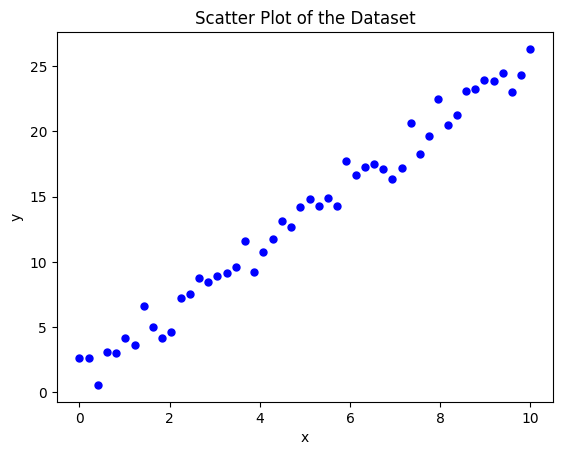

In [4]:
# Plotting data
plt.figure()
plt.plot(x_vals, y_vals, 'bo', markersize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of the Dataset')
plt.show()

In [5]:
def y_func(m, b, x):
  """
  Calculates the predicted y values for a given m, b, and array of x values.

  Parameters:
    - m: Slope of the linear relationship (scalar).
    - b: Intercept of the linear relationship (scalar).
    - x: Array of input values.

  Returns:
    - Array of predicted y values.
  """
  return np.dot(m, x) + b

In [6]:
def loss_function(params, x, y):
  """
  Calculates the mean squared error loss for a linear regression model.

  Args:
    m: Slope of the line.
    b: Intercept of the line.
    x: Array of x values.
    y: Array of y values.

  Returns:
    The mean squared error loss.
  """
  m, b = params
  y_predicted = y_func(m, b, x)
  return np.mean((y - y_predicted)**2)

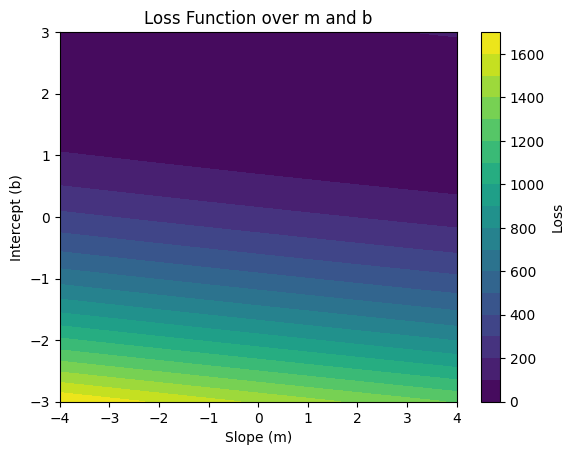

In [7]:
# range for m and b
m_range = np.linspace(-4, 4, 100)
b_range = np.linspace(-3, 3, 100)

# Initialize grid
Z = np.zeros((len(m_range), len(b_range)))

# loss for each point in the grid
for i, m_val in enumerate(m_range):
  for j, b_val in enumerate(b_range):
    Z[i, j] = loss_function(params=(m_val, b_val), x=x_vals, y=y_vals)

# Plotting the loss function with colorbar
plt.figure()
contour = plt.contourf(m_range, b_range, Z, levels=20, cmap='viridis')

# Addding colorbar with label
colorbar = plt.colorbar(contour, label='Loss Value')
colorbar.set_label('Loss')  # Set colorbar label

#axis labels
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (b)')

plt.title('Loss Function over m and b')

plt.show()

In [8]:
!rm -r /content/assignment1

rm: cannot remove '/content/assignment1': No such file or directory


In [9]:
!mkdir /content/assignment1

In [10]:
plot_folder = "/content/assignment1"

# Initialize random values for m and b
# m_curr = np.random.random()
# b_curr = np.random.random()
m_curr = 0.0
b_curr = 0.0

# Gradient of the loss function
grad_loss = grad(loss_function)

learning_rate = 0.0001

iterations = 1000

# Gradient descent
for i in range(iterations):
    # gradient at the current values of m and b
    gradients = grad_loss((m_curr, b_curr), x_vals, y_vals)


    m_curr -= learning_rate * gradients[0]
    b_curr -= learning_rate * gradients[1]

    if i== 0 or (i + 1) % 10 == 0:
        plt.plot(x_vals, y_vals, 'o', label='Data Points')  # data points
        plt.plot(x_vals, np.dot(m_curr, x_vals) + b_curr, label=f'Iteration {i+1}')  # current line

        current_loss = loss_function((m_curr, b_curr), x_vals, y_vals)
        plt.legend([f'Data Points', f'Loss: {current_loss:.2f}'], handlelength=0)


        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Neuron - Iteration {i+1}')


        filename = f"{plot_folder}/plot_{i+1}.png"
        plt.savefig(filename)

        # Clear the plot for the next iteration
        plt.clf()

# Final values of m and b
print("Final values of m and b:")
print("m:", m_curr)
print("b:", b_curr)

Final values of m and b:
m: 2.565843767803204
b: 0.4350355565843611


<Figure size 640x480 with 0 Axes>

In [11]:
import imageio
import os

# Sorting image paths numerically
def sort_images(filepaths):
  return sorted(filepaths, key=lambda x: int(os.path.splitext(x)[0].split('_')[-1]))

image_paths = [os.path.join('/content/assignment1', f) for f in os.listdir('/content/assignment1') if f.endswith(('.png', '.jpg', '.jpeg'))]

sorted_paths = sort_images(image_paths)

images = []
for path in sorted_paths:
  images.append(imageio.imread(path))

# duration of each frame (in seconds)
duration = 0.1

imageio.mimsave('/content/output.gif', images, fps=1/duration)

print("GIF created successfully!")

<ipython-input-11-98e7a1deaee2>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


GIF created successfully!


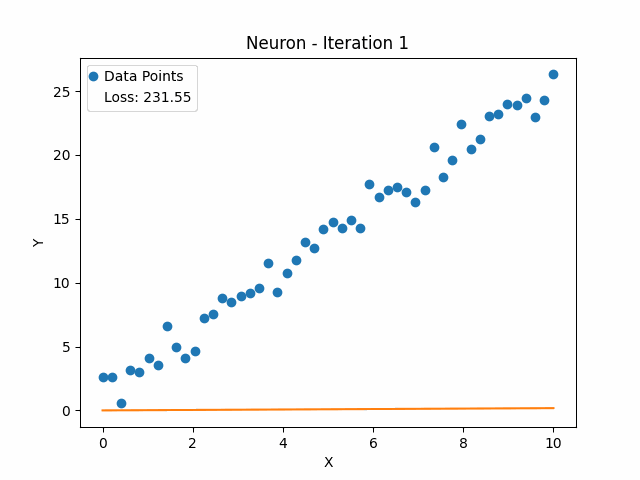

In [14]:
from IPython.display import Image
Image(filename='/content/output.gif')